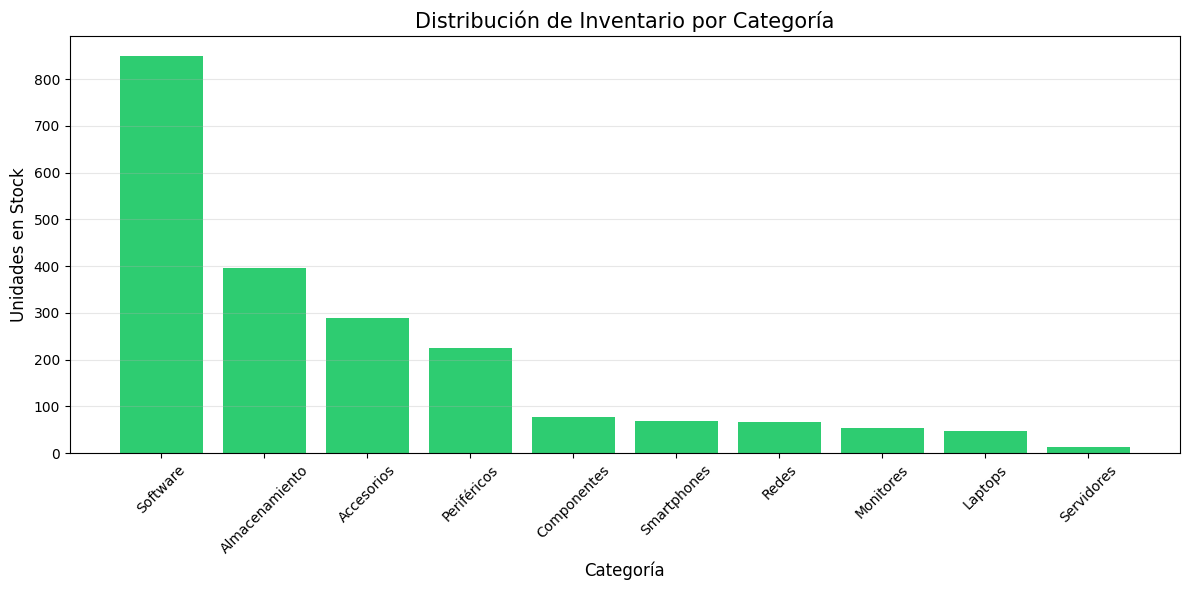

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

USER = "postgres"
PASS = "12345678"
HOST = "localhost"
PORT = "5432"
DB   = "sistema_ventas"


url_conexion = f"postgresql+psycopg://{USER}:{PASS}@{HOST}:{PORT}/{DB}"


engine = create_engine(url_conexion)


sql_query = """
    SELECT 
        categorias.nombre AS categoria, 
        SUM(productos.stock) AS stock_total
    FROM productos
    JOIN categorias ON productos.categoria_id = categorias.categoria_id
    GROUP BY categorias.nombre
    ORDER BY stock_total DESC;
"""


with engine.connect() as conn:
    df = pd.read_sql(text(sql_query), con=conn)


plt.figure(figsize=(12, 6))
plt.bar(df['categoria'], df['stock_total'], color='#2ecc71') 


plt.title('Distribución de Inventario por Categoría', fontsize=15)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Unidades en Stock', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()